In [33]:
# import important libraries
import cv2
import dlib
import numpy as np

In [34]:
# Do this if necessary
# !pip install google-colab-patches

In [35]:
from google.colab.patches import cv2_imshow

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
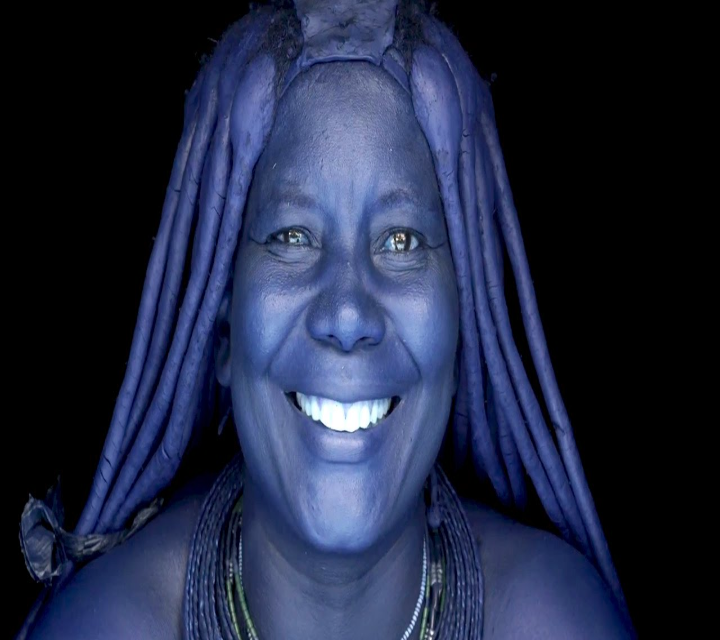

In [44]:
# Loading the image to be detected for Age
img = cv2.imread('/content/woman3.jpg')
img = cv2.resize(img, (720,640))
frame = img.copy()
frame

In [45]:
# Load the mode for age Detection
age_weights = '/content/age_deploy.prototxt'         # loading the weights model
age_config = '/content/age_net.caffemodel'           # loading the configuration model
age_Net = cv2.dnn.readNet(age_config, age_weights)   # Combining the 2 models to guess the accurate age

In [46]:
# Model requirements for age detection

age_list = ['(0-2)','(4-6)','(8-12)','(15-20)','(25-32)','(38-43)','(48-53)','(60-100)']
model_mean = (78.4263377603, 87.7689143744, 114.895847746)


In [47]:
# Storing the  image dimensions
fH = img.shape[0]
fW = img.shape[1]

boxes = []                # box to store the coordinates of the detected face
mssg = 'Face Detected'    # Message to be displayed over the image

In [48]:
# Loading the model for face Detection from dlib

face_detector = dlib.get_frontal_face_detector()        # getting the face detector model from dlib
img_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)      #Converting to grayscale image

In [49]:
# Detecting the faces in the picture
faces = face_detector(img_gray)

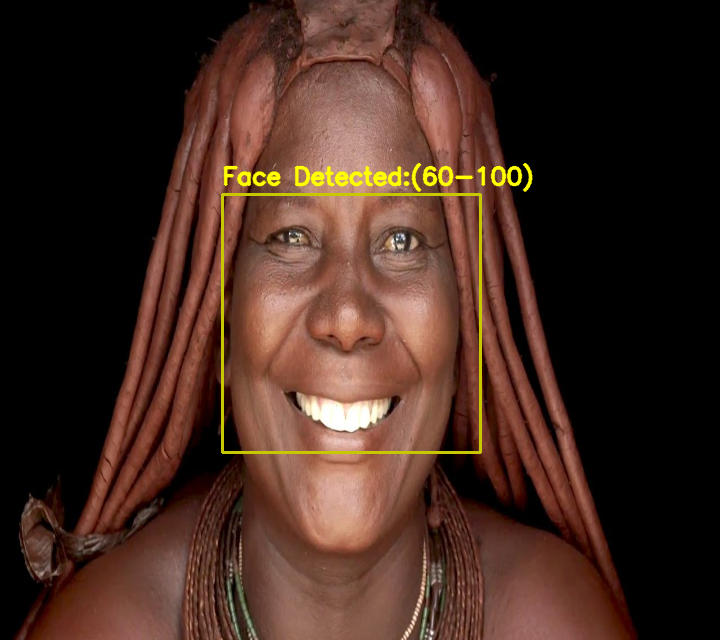

In [50]:
# If not faces are detected
if not faces:
    mssg = 'No faces detected'
    cv2.putText(img, f'{mssg}', (40,40), cv2.FONT_HERSHEY_COMPLEX,2 ,(200), 2)
    cv2_imshow(img)
    cv2.waitKey(0)

# Face is detected
else:
    # Buildiing the Face
    for face in faces:
        x = face.left()       # Extracting the face coordinates
        y = face.top()
        x2 = face.right()
        y2 = face.bottom()

        #rescaling those coordinates for our image
        box = [x, y, x2, y2]
        boxes.append(box)
        cv2.rectangle(frame, (x, y), (x2, y2),
                      (00, 200, 200), 2)

    for box in boxes:
        face = frame[box[1]:box[3], box[0]:box[2]]

        # Image processiing
        blob = cv2.dnn.blobFromImage(
            face, 1.0, (227, 227), model_mean, swapRB = False
        )

        # Age Prediction
        age_Net.setInput(blob)
        age_preds = age_Net.forward()
        age = age_list[age_preds[0].argmax()]

        cv2.putText(frame, f'{mssg}:{age}',(box[0],
                                            box[1]-10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8,
                    (0, 255, 255), 2, cv2.LINE_AA)
        cv2_imshow(frame)
        cv2.waitKey(0)